In [ ]:
# Import all libraries 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math

from google.colab import files
import io

In [ ]:
# Connect to the first dataset
uploaded = files.upload()

Saving owid-co2-data.csv to owid-co2-data.csv


In [ ]:
dataset1 = pd.read_csv(io.BytesIO(uploaded["owid-co2-data.csv"]))

In [ ]:
dataset1.shape

(25989, 60)

In [ ]:
dataset1.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [ ]:
# Connect to the first dataset
uploaded = files.upload()

Saving continent.csv to continent.csv


In [ ]:
dataset2 = pd.read_csv(io.BytesIO(uploaded["continent.csv"]))

In [ ]:
dataset2.shape

(262, 6)

In [ ]:
dataset2.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0



# **Cleaning**

In [ ]:
# Dropping unecessary columns
dataset2 = dataset2.drop(columns = ['Continent_Code', 'Country_Name', 'Two_Letter_Country_Code', 'Country_Number'])

In [ ]:
# Renaming columns
dataset2.columns = ['continent', 'Code']

In [ ]:
dataset2 = dataset2.rename(columns = {'Code': 'iso_code'})

Merging both Data Frames into one:

In [ ]:
# Merging both datasets on the columns 'iso-code' to use dataset with continents on it
dataset = pd.merge(dataset1, dataset2, how = 'inner', on = 'iso_code')

In [ ]:
# Dropping the columns we are not using for this analysis
dataset.drop(columns = ['co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share','co2_per_capita', 'consumption_co2_per_capita', 
                   'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy', 
                   'cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita','other_co2_per_capita', 
                   'share_global_coal_co2', 'share_global_oil_co2', 'share_global_gas_co2', 'share_global_flaring_co2', 'share_global_cement_co2', 'cumulative_coal_co2', 
                   'cumulative_oil_co2', 'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2', 'share_global_cumulative_coal_co2', 
                   'share_global_cumulative_oil_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_cement_co2', 
                   'ghg_per_capita', 'methane_per_capita', 'nitrous_oxide_per_capita', 'energy_per_capita', 'energy_per_gdp'], inplace = True, axis = 1)

In [ ]:
# We will work with countries only for this analysis, so we will drop the continents.
dataset =  dataset.loc[dataset['country'] != 'Africa']
dataset =  dataset.loc[dataset['country'] != 'Asia']
dataset =  dataset.loc[dataset['country'] != 'Asia (excl. China & India)']
dataset =  dataset.loc[dataset['country'] != 'Australia']
dataset =  dataset.loc[dataset['country'] != 'Central African Republic']
dataset =  dataset.loc[dataset['country'] != 'EU-27']
dataset =  dataset.loc[dataset['country'] != 'EU-28']
dataset =  dataset.loc[dataset['country'] != 'Europe']
dataset =  dataset.loc[dataset['country'] != 'Europe (excl. EU-27)']
dataset =  dataset.loc[dataset['country'] != 'Europe (excl. EU-28)']
dataset =  dataset.loc[dataset['country'] != 'French Equatorial Africa']
dataset =  dataset.loc[dataset['country'] != 'French West Africa']
dataset =  dataset.loc[dataset['country'] != 'International transport']
dataset =  dataset.loc[dataset['country'] != 'North America']
dataset =  dataset.loc[dataset['country'] != 'North America (excl. USA)']
dataset =  dataset.loc[dataset['country'] != 'South America']
dataset =  dataset.loc[dataset['country'] != 'World']

In [ ]:
# Renaming columns I will use
dataset = dataset.rename(columns={'iso_code': 'Code', 'country':'Country','year':'Year','co2':'CO2','cement_co2':'Cement',
       'coal_co2':'Coal','flaring_co2':'Flaring','gas_co2':'Gas','oil_co2':'Oil','other_industry_co2':'Other industry','total_ghg':'GHG','methane':'Methane','nitrous_oxide':'Nitrous Oxide','primary_energy_consumption':'Primary Energy Consumption','population':'Population','gdp':'GDP', 'continent':'Continent'})

# **Exploratory Analysis**

In [ ]:
dataset.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
0,AFG,Afghanistan,1949,0.015,NaN,0.015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,Asia
1,AFG,Afghanistan,1950,0.084,NaN,0.021,NaN,NaN,0.063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,Asia
2,AFG,Afghanistan,1951,0.092,NaN,0.026,NaN,NaN,0.066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,Asia
3,AFG,Afghanistan,1952,0.092,NaN,0.032,NaN,NaN,0.060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,Asia
4,AFG,Afghanistan,1953,0.106,NaN,0.038,NaN,NaN,0.068,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,Asia


In [ ]:
# The columns are we working with?
dataset.columns

Index(['Code', 'Country', 'Year', 'CO2', 'Cement', 'Coal', 'Flaring', 'Gas',
       'Oil', 'Other industry', 'cumulative_other_co2',
       'share_global_other_co2', 'share_global_cumulative_other_co2', 'GHG',
       'total_ghg_excluding_lucf', 'ghg_excluding_lucf_per_capita', 'Methane',
       'Nitrous Oxide', 'Population', 'GDP', 'Primary Energy Consumption',
       'Continent'],
      dtype='object')

In [ ]:
# The overall shape 
dataset.shape

(30194, 22)

In [ ]:
# The overall type of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30194 entries, 0 to 38973
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               22498 non-null  object 
 1   Country                            30194 non-null  object 
 2   Year                               30194 non-null  int64  
 3   CO2                                28148 non-null  float64
 4   Cement                             14279 non-null  float64
 5   Coal                               20919 non-null  float64
 6   Flaring                            5475 non-null   float64
 7   Gas                                10763 non-null  float64
 8   Oil                                23950 non-null  float64
 9   Other industry                     2812 non-null   float64
 10  cumulative_other_co2               2812 non-null   float64
 11  share_global_other_co2             2812 non-null   flo

Handling nulls:

In [ ]:
# Identifing the rows that contain nulls
dataset.isnull().values.any()

True

In [ ]:
null_rows = dataset[dataset.isnull().any(axis=1)]
null_rows.head(10)

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
0,AFG,Afghanistan,1949,0.015,NaN,0.015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,Asia
1,AFG,Afghanistan,1950,0.084,NaN,0.021,NaN,NaN,0.063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,Asia
2,AFG,Afghanistan,1951,0.092,NaN,0.026,NaN,NaN,0.066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,Asia
3,AFG,Afghanistan,1952,0.092,NaN,0.032,NaN,NaN,0.060,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,Asia
4,AFG,Afghanistan,1953,0.106,NaN,0.038,NaN,NaN,0.068,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,Asia
5,AFG,Afghanistan,1954,0.106,NaN,0.043,NaN,NaN,0.064,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,Asia
6,AFG,Afghanistan,1955,0.154,NaN,0.062,NaN,NaN,0.092,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,Asia
7,AFG,Afghanistan,1956,0.183,NaN,0.062,NaN,NaN,0.121,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,Asia
8,AFG,Afghanistan,1957,0.293,NaN,0.077,NaN,NaN,0.216,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,Asia
9,AFG,Afghanistan,1958,0.330,NaN,0.092,NaN,NaN,0.238,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,Asia


In [ ]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28979 entries, 0 to 38973
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               21283 non-null  object 
 1   Country                            28979 non-null  object 
 2   Year                               28979 non-null  int64  
 3   CO2                                26933 non-null  float64
 4   Cement                             13064 non-null  float64
 5   Coal                               19704 non-null  float64
 6   Flaring                            4260 non-null   float64
 7   Gas                                9548 non-null   float64
 8   Oil                                22735 non-null  float64
 9   Other industry                     1597 non-null   float64
 10  cumulative_other_co2               1597 non-null   float64
 11  share_global_other_co2             1597 non-null   flo

Looks like the majority of nulls are in the key metrics that are calculated global, which makes sense because there are years where there are no key metrics values registred.

In [ ]:
dataset.describe()

,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,cumulative_other_co2,share_global_other_co2,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption
count,30194.000000,28148.000000,14279.000000,20919.000000,5475.000000,10763.000000,23950.000000,2812.000000,2812.000000,2812.000000,2812.000000,5793.000000,5793.000000,5793.000000,5800.000000,5800.000000,2.362500e+04,1.355100e+04,9787.000000
mean,1950.176393,392.926075,18.766405,263.962636,17.025586,143.798269,149.092373,20.841239,414.405502,22.533873,21.993972,199.563549,195.338018,6.705544,40.613066,13.391257,2.172618e+07,2.495490e+11,947.056559
std,56.360209,1543.231926,74.625779,813.913950,32.014497,438.080996,625.618528,38.256954,876.693404,33.215705,32.840369,740.923123,784.173389,7.101979,123.781543,40.973016,8.509331e+07,9.779091e+11,3368.417369
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,-178.710000,0.010000,0.101000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000
25%,1918.000000,0.597000,0.142000,0.410000,0.319000,0.475500,0.330000,1.089500,12.812500,0.437500,0.290000,7.470000,6.120000,2.053000,1.750000,0.420000,1.052334e+06,9.999842e+09,6.278000
50%,1965.000000,5.999500,0.673000,5.727000,2.528000,5.042000,2.379500,3.885500,63.395000,2.090000,1.340000,31.670000,26.260000,4.217000,7.890000,3.190000,4.263344e+06,3.073096e+10,48.672000
75%,1994.000000,58.377750,4.184000,63.601000,16.093500,42.429000,21.698000,21.108000,334.168000,32.125000,39.580000,107.170000,87.300000,8.708000,27.955000,9.865000,1.359303e+07,1.283058e+11,305.759000
max,2020.000000,16054.374000,1040.909000,8982.766000,174.364000,4021.047000,6184.459000,213.154000,5761.328000,100.000000,100.000000,11705.810000,12355.240000,53.650000,1242.430000,547.290000,1.439324e+09,1.815162e+13,40404.443000


## Ethiopia vs. Nigeria Population and GDP (1750-2016)

Text(0.5, 0, 'Year')

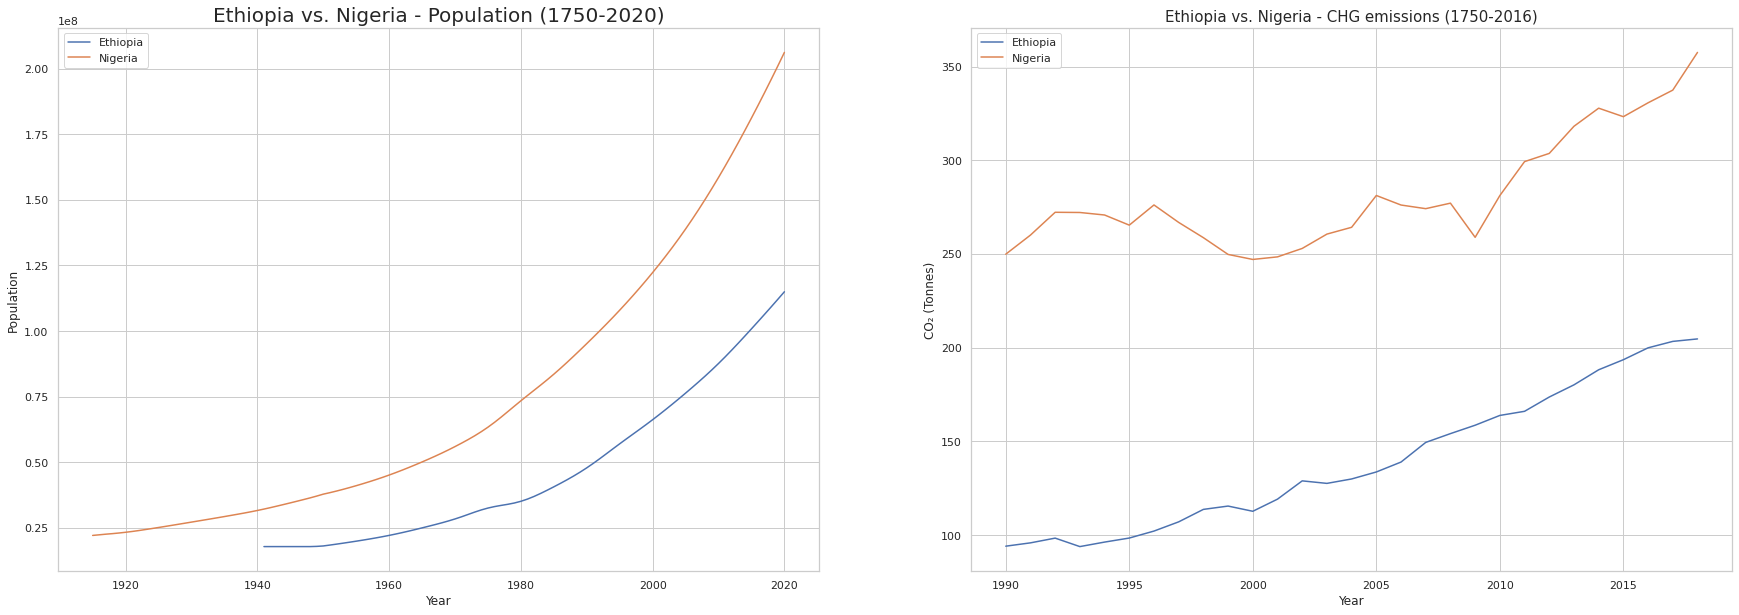

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,1)
plt.title("Ethiopia vs. Nigeria - Population (1750-2020)", fontsize = 20)
sns.lineplot(x  = "Year", y = "Population", label = "Ethiopia", data = dataset[dataset['Country'] == "Ethiopia"])
sns.lineplot(x  = "Year", y ="Population", label = "Nigeria", data = dataset[dataset['Country'] == "Nigeria"])
plt.ylabel('Population')
plt.xlabel('Year')


plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,2)
plt.title("Ethiopia vs. Nigeria - CHG emissions (1750-2016)", fontsize = 15)
sns.lineplot(x  = "Year", y = "GHG", label = "Ethiopia", data = dataset[dataset['Country'] == "Ethiopia"])
sns.lineplot(x  = "Year", y = "GHG", label = "Nigeria", data = dataset[dataset['Country'] == "Nigeria"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

# **Data wrengling**

For this analysis we will use information provided between 2015-2020, so we will create a new DataFrame that includes only these years:

In [ ]:
# Selecting data for the years between 2015-2020 and creating a new DataFrame with that
years_dataset = dataset[(dataset['Year'] >= 2015) & (dataset['Year'] <= 2020)]
years_dataset.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,...,share_global_cumulative_other_co2,GHG,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,Methane,Nitrous Oxide,Population,GDP,Primary Energy Consumption,Continent
66,AFG,Afghanistan,2015,7.904,0.041,2.843,NaN,0.282,4.738,NaN,...,NaN,93.48,93.73,2.724,76.59,8.59,34413603.0,6.278339e+10,37.012,Asia
67,AFG,Afghanistan,2016,6.745,0.076,2.878,NaN,0.319,3.472,NaN,...,NaN,95.53,95.37,2.695,78.15,9.12,35383028.0,6.429743e+10,34.458,Asia
68,AFG,Afghanistan,2017,6.860,0.045,3.448,NaN,0.300,3.067,NaN,...,NaN,97.45,97.30,2.681,79.61,9.45,36296111.0,6.875280e+10,36.617,Asia
69,AFG,Afghanistan,2018,8.345,0.057,3.849,NaN,0.293,4.146,NaN,...,NaN,99.08,98.92,2.661,81.51,8.96,37171922.0,6.759497e+10,41.989,Asia
70,AFG,Afghanistan,2019,12.147,0.038,7.531,NaN,0.306,4.272,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38041757.0,NaN,35.974,Asia


We are going to drop the nulls in 'CO₂' and 'GHG' columns. Other than that, none of the columns I'm interested for the purpose of this analysis have nulls.

In [ ]:
years_dataset['CO2'].dropna()
years_dataset['GHG'].dropna()

66        93.48
67        95.53
68        97.45
69        99.08
11140      0.20
          ...  
38853     93.23
38968     42.89
38969    116.52
38970    116.09
38971    118.77
Name: GHG, Length: 800, dtype: float64

In [ ]:
# Let's do basic statistics analisys on the emissions between 2015-2020
years_dataset[['CO2', 'GHG']].describe()

,CO2,GHG
count,1572.000000,800.000000
mean,768.702080,238.443550
std,2667.331439,951.021371
min,0.007000,-177.030000
25%,1.498500,8.887500
50%,10.853500,39.140000
75%,114.332250,118.680000
max,16054.374000,11705.810000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GHG Distribution 2015-2020')

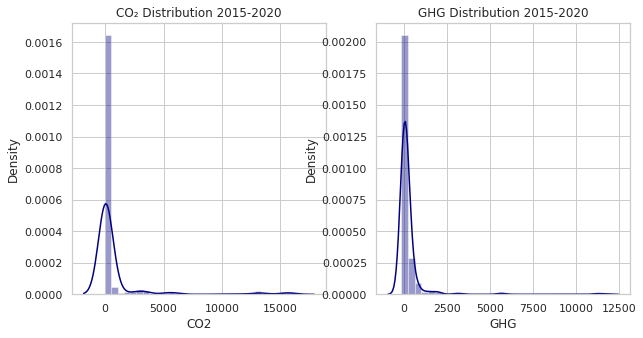

In [ ]:
# Let's look at the distribution of CO2 emissions 2015-2020
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(years_dataset['CO2'], bins = 30, color = 'navy')
plt.title('CO₂ Distribution 2015-2020')

# Let's look at the distribution of GHG emissions 2012-2016
plt.subplot (1,2,2)
ax = sns.distplot(years_dataset['GHG'], bins = 30, color = 'navy')
plt.title('GHG Distribution 2015-2020')